<a href="https://colab.research.google.com/github/santiagopaez74214/lab01-IA/blob/main/PROYECTO_TORRES_DE_HANOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. TORRES DE HANOI**
## **CONTEXTO DEL JUEGO**

Es un juego matemático o rompecabezas que consiste en tres varillas y varios discos de diferentes diámetros, que pueden deslizarse sobre cualquier varilla. El rompecabezas comienza con los discos apilados sobre una varilla en orden decreciente de tamaño, con el más pequeño en la parte superior, adoptando así una forma cónica.

####  **OBJETIVO**

El objetivo del rompecabezas es mover toda la pila a la varilla que está más a la derecha.

#### **REGLAS DE JUEGO**

1. Sólo se puede mover un disco a la vez.
2. Cada movimiento consiste en tomar el disco superior de una de las pilas y colocarlo encima de otra pila o sobre una varilla vacía.
3. No se podrá colocar ningún disco encima de otro que sea más pequeño que él.

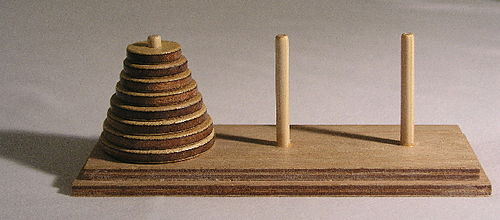

# **II. SOLUCIONAR PROBLEMAS**
## **A. SOLUCIONANDO**

1. Presente el diseño del problema y del modelo (abstraction matemática)
2. Implemente los componentes necesarios para solucionar el problema
3. Use el algoritmo de búsqueda correspondiente para solucionar el problema
4. Presente la secuencia de acciones que soluciona el problema usando el algoritmo implementado

## **1. ABSTRACCIÓN**

* Espacio de estados: Dado $n$ discos apilados todos sobre una de las tres varillas, total de estados determinados por $3^n$ de movimientos legales válidos. En el caso de $n = 6$ discos el espacio de estados es de 729.

* Estado inicial: Una varilla con una pila de $n$ discos ordenados de menor a mayor, y dos varrillas sin discos en su interior $([p_{1},p_{2},...,p_{n}],[],[])$.

* Estados objetivos: Un estado posible, con una pila de $n$ discos ordenados de menor a mayor de acuerdo a su "diámetro" $d$, en cualquiera de las dos varillas distintas a la de la pila inicial de discos.

  $([], [], [p_{1},p_{2},...,p_{n}])$.

* Acciones: Mover el disco superior de una varilla a otra, cumpliendo:

- Solo se mueve el disco superior.
- Solo se puede colocar sobre un disco más grande o sobre una varilla vacía.

  Es decir, dado un disco superior $k$ elejido si se quiere mover a otra varilla que tenga un disco $j$ en la parte superior $k < j$ para poder ser un movimiento admisible.

* Modelo de transición: Al aplicar una acción a un estado S, se obtiene s´ estado.  

* Costo de acción: El costo de realizar hacer una acción (pasar un disco a otra varrilla) tiene costo de 1 para todos los estados.

* Heurística: Es un $h(n) = n´$ discos ubicados de manera incorrecta + el número de discos en la varilla destino. Por lo que cuenta con todos los discos que no están en la variila destino o están en un orden incorrecto.

In [57]:
class Node:
  def __init__(self, state, parent=None, action=None, path_cost=0):
    self.state = state
    self.parent = parent
    self.action = action
    self.path_cost = path_cost

  def representation(self):
    return f"{self.state}"

In [58]:
import heapq

class Frontier:
  def __init__(self):
    self.items = []
    self.count = 0

  def is_empty(self):
    return len(self.items) == 0

  def pop(self):
    _, _, node = heapq.heappop(self.items)
    return node
  def top(self):
    return self.items[0][1]

  def add(self, node, priority):
    heapq.heappush(self.items, (priority, self.count, node))
    self.count += 1

In [59]:
class Towers:
  def __init__(self, initial_state, goal, n):
    self.n = n
    self.initial = tuple(tuple(t) for t in initial_state)
    self.goal = tuple(tuple(t) for t in goal)

  def is_goal(self, state):
    return state == self.goal

  def result_actions(self, state):
    actions = []
    for i, tower in enumerate(state):
      if tower:
        disk = tower[0]
        for j, next_tower in enumerate(state):
          if i != j:
            if not next_tower or next_tower[0] > disk:
              actions.append((i, j))
    return actions

  def result(self, state, action):
    i, j = action
    new_state = [list(t) for t in state]
    disk = new_state[i].pop(0)
    new_state[j].insert(0, disk)
    return tuple(tuple(t) for t in new_state)

  def action_cost(self, state, action, next_state):
    return 1

  def heuristic(self, state, n):
    wrong_disks = 0
    wrong_disks += len(state[0])
    wrong_disks += len(state[1])

    tower_goal = state[2]
    for j, disk in enumerate(reversed(tower_goal)):
      if disk != n - j:
        wrong_disks += 1
    return wrong_disks + len(tower_goal)

In [60]:
failure = Node("Failure", path_cost = float('inf'))

In [61]:
def expand(problem, node):
  state = node.state
  children = []
  for action in problem.result_actions(state):
    child_state = problem.result(state, action)
    cost = node.path_cost + problem.action_cost(state, action, child_state)
    children.append(Node(state=child_state, parent=node, action=action, path_cost=cost))
  return children

In [62]:
def a_star(problem, f):
  node = Node(problem.initial)
  frontier = Frontier()
  frontier.add(node, f(node))
  reached = {problem.initial: node}

  while not frontier.is_empty():
    node = frontier.pop()
    if problem.is_goal(node.state):
      return node
    for child in expand(problem, node):
      state = child.state
      if state not in reached or child.path_cost < reached[state].path_cost:
        reached[state] = child
        frontier.add(child, f(child))

  return failure

In [63]:
def get_secuence(node):
  path = []
  current = node
  while current is not None:
    path.append(current.representation())
    current = current.parent
  return path[::-1]

In [64]:
n = 6
initial_tower = ([1, 2, 3, 4, 5, 6], [], [])
goals_towers = ([], [], [1, 2, 3, 4, 5, 6])

problem = Towers(initial_tower, goals_towers, n)

f = lambda x: x.path_cost + problem.heuristic(x.state, n)

solution = a_star(problem, f)

actions = get_secuence(solution)

for i, state in enumerate(actions):
    print(f"Paso {i}: {state}")
print("\nResumen:")
print(f"Discos: {n}")
print(f"Movimientos óptimos esperados: {2**n - 1}")
print(f"Movimientos encontrados: {len(actions) - 1}")

Paso 0: ((1, 2, 3, 4, 5, 6), (), ())
Paso 1: ((2, 3, 4, 5, 6), (1,), ())
Paso 2: ((3, 4, 5, 6), (1,), (2,))
Paso 3: ((3, 4, 5, 6), (), (1, 2))
Paso 4: ((4, 5, 6), (3,), (1, 2))
Paso 5: ((1, 4, 5, 6), (3,), (2,))
Paso 6: ((1, 4, 5, 6), (2, 3), ())
Paso 7: ((4, 5, 6), (1, 2, 3), ())
Paso 8: ((5, 6), (1, 2, 3), (4,))
Paso 9: ((5, 6), (2, 3), (1, 4))
Paso 10: ((2, 5, 6), (3,), (1, 4))
Paso 11: ((1, 2, 5, 6), (3,), (4,))
Paso 12: ((1, 2, 5, 6), (), (3, 4))
Paso 13: ((2, 5, 6), (1,), (3, 4))
Paso 14: ((5, 6), (1,), (2, 3, 4))
Paso 15: ((5, 6), (), (1, 2, 3, 4))
Paso 16: ((6,), (5,), (1, 2, 3, 4))
Paso 17: ((1, 6), (5,), (2, 3, 4))
Paso 18: ((1, 6), (2, 5), (3, 4))
Paso 19: ((6,), (1, 2, 5), (3, 4))
Paso 20: ((3, 6), (1, 2, 5), (4,))
Paso 21: ((3, 6), (2, 5), (1, 4))
Paso 22: ((2, 3, 6), (5,), (1, 4))
Paso 23: ((1, 2, 3, 6), (5,), (4,))
Paso 24: ((1, 2, 3, 6), (4, 5), ())
Paso 25: ((2, 3, 6), (1, 4, 5), ())
Paso 26: ((3, 6), (1, 4, 5), (2,))
Paso 27: ((3, 6), (4, 5), (1, 2))
Paso 28: ((6,), (

#### **VIDEO EJECUCIÓN MOVIMIENTOS**

https://1drv.ms/f/c/572dc8ebdfc63558/IgD1sTq4jiOzS4-mYKMG8zBSATsPKNJaur1FzF36ObmPBmw?e=RCqzNg


## Referencias
* <cite data-cite="russell2021artificial">Russell, S., & Norvig, P. (2021). Artificial Intelligence: A Modern Approach.</cite>
* <cite data-cite="wikipedia2026towerofhanoi">Wikipedia contributors. (2026). [Tower of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi). *Wikipedia, The Free Encyclopedia*.</cite>
* <cite>Matematicaula, & 侯杰材. <i>Torre de Hanoi</i>. GeoGebra. Recuperado de <a href="https://www.geogebra.org/m/NqyWJVra">GeoGebra</a></cite>